In [45]:
from scipy.stats import binom, bernoulli, norm
import numpy as np
import matplotlib.pyplot as plt

Binomial Method: (0.5020112513624978, 0.5216054246216176)
Normal Method: (0.4386977045464704, 0.584918971437645)


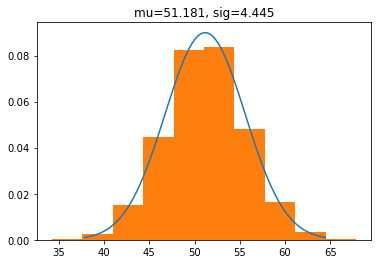

In [188]:
n = 100
p = 0.5
rv = binom(n, p)

# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
bi = binom(n, p)
samples = bi.rvs(1000)
b_mu = samples.mean()
b_sig = samples.std()

x = np.linspace(mu - 3*sig, mu + 3*sig, 100)
y = norm.pdf(x, mu, sig) 
rvs = norm.rvs(mu, sig, 10000)
mu = rvs.mean()
sig = rvs.std()

fig, ax = plt.subplots()
ax.plot(x, y)
ax.hist(rvs, density=True)
ax.set_title(f"mu={round(mu, 3)}, sig={round(sig, 3)}")

def binom_conf_interval(rvs, conf=0.95):
    n = len(rvs)
    phat = rvs.mean() / 100
    constant = np.sqrt((phat*(1-phat)) / n)
    probit = (1 - 0.95) * 0.5 # (1 - desired error) * 0.5
    ci = np.abs(norm.ppf(probit))
    lower = phat - (ci * constant)
    upper = phat + (ci * constant)
    return (lower, upper)

def norm_conf_interval(rvs, conf=0.95):
    n = len(rvs)
    phat = rvs.mean() / 100
    sig = rvs.std()
    constant = sig / np.sqrt(n)
    ci = np.abs(norm.ppf(conf))
    lower = phat - (ci * constant)
    upper = phat + (ci * constant)
    return (lower, upper)

print('Binomial Method:', binom_conf_interval(rvs))
print('Normal Method:', norm_conf_interval(rvs))